# Parte 3 - Word Vectors

### Importando os dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk 
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
import logging
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
import gensim

INFO - 16:53:20: 'pattern' package not found; tag filters are not available for English


Como já limpamos o texto anteriormente, aqui irei apenas importar o arquivo com os pré-processamentos feitos na primeira parte:

In [2]:
#Importando os dados
df = pd.read_csv('../gabarito/clean-imdb-reviews.csv', index_col=0)

In [3]:
df.head()

,review,sentiment,clean_text
0,One of the other reviewers has mentioned that ...,1,one reviewers mention watch oz episode hook ri...
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,think wonderful way spend time hot summer week...
3,Basically there's a family where a little boy ...,0,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visually stunnin...


### Bigramas

Preparando o input:

In [4]:
sent = [row.split() for row in df.clean_text] #transforma em uma lista de listas

In [5]:
from gensim.models.phrases import Phrases, Phraser

phrases = Phrases(sent, min_count=2, threshold=30, progress_per=10000)
bigram = Phraser(phrases)

INFO - 16:53:22: collecting all words and their counts
INFO - 16:53:22: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 16:53:25: PROGRESS: at sentence #10000, processed 1182018 words and 811621 word types
INFO - 16:53:28: PROGRESS: at sentence #20000, processed 2364665 words and 1427613 word types
INFO - 16:53:31: PROGRESS: at sentence #30000, processed 3546171 words and 1975650 word types
INFO - 16:53:34: PROGRESS: at sentence #40000, processed 4726745 words and 2479308 word types
INFO - 16:53:37: collected 2950798 word types from a corpus of 5912344 words (unigram + bigrams) and 50000 sentences
INFO - 16:53:37: using 2950798 counts as vocab in Phrases<0 vocab, min_count=2, threshold=30, max_vocab_size=40000000>
INFO - 16:53:37: source_vocab length 2950798
INFO - 16:54:18: Phraser built with 37162 phrasegrams


In [6]:
#exemplo
print(bigram["new york is awesome".split()])

['new_york', 'is', 'awesome']


Como podemos ver, o modelo conseguiu captar o bigrama "New York"

In [7]:
sentences = bigram[sent]

## Treinando o modelo

In [8]:
import multiprocessing
from gensim.models import Word2Vec

In [9]:
cores = multiprocessing.cpu_count()

In [29]:
#Iniciando o word2vec
w2v = Word2Vec(min_count=20, 
               window=2, 
               size=300,  
               sample=6e-5, 
               alpha=0.03, 
               min_alpha=0.0007, 
               negative=20,
               workers=cores-1)

In [30]:
#construido a tabela do vocabulário
w2v.build_vocab(sentences, progress_per=10000)

INFO - 17:15:33: collecting all words and their counts
INFO - 17:15:33: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 17:15:38: PROGRESS: at sentence #10000, processed 1096281 words, keeping 69300 word types
INFO - 17:15:44: PROGRESS: at sentence #20000, processed 2193186 words, keeping 93573 word types
INFO - 17:15:48: PROGRESS: at sentence #30000, processed 3288503 words, keeping 109400 word types
INFO - 17:15:52: PROGRESS: at sentence #40000, processed 4382918 words, keeping 121295 word types
INFO - 17:15:57: collected 131123 word types from a corpus of 5483050 raw words and 50000 sentences
INFO - 17:15:57: Loading a fresh vocabulary
INFO - 17:15:57: effective_min_count=20 retains 18921 unique words (14% of original 131123, drops 112202)
INFO - 17:15:57: effective_min_count=20 leaves 5030473 word corpus (91% of original 5483050, drops 452577)
INFO - 17:15:57: deleting the raw counts dictionary of 131123 items
INFO - 17:15:57: sample=6e-05 downsamples 975 m

In [31]:
#Treinando o modelo
w2v.train(sentences, total_examples=w2v.corpus_count, epochs=20, report_delay=1)

INFO - 17:15:57: training model with 3 workers on 18921 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2
INFO - 17:15:59: EPOCH 1 - PROGRESS: at 3.32% examples, 89501 words/s, in_qsize 0, out_qsize 0
INFO - 17:16:00: EPOCH 1 - PROGRESS: at 6.52% examples, 91044 words/s, in_qsize 0, out_qsize 0
INFO - 17:16:01: EPOCH 1 - PROGRESS: at 9.93% examples, 92389 words/s, in_qsize 0, out_qsize 0
INFO - 17:16:02: EPOCH 1 - PROGRESS: at 13.28% examples, 93005 words/s, in_qsize 0, out_qsize 0
INFO - 17:16:03: EPOCH 1 - PROGRESS: at 16.57% examples, 92988 words/s, in_qsize 0, out_qsize 0
INFO - 17:16:04: EPOCH 1 - PROGRESS: at 20.04% examples, 93337 words/s, in_qsize 0, out_qsize 0
INFO - 17:16:05: EPOCH 1 - PROGRESS: at 23.37% examples, 92923 words/s, in_qsize 0, out_qsize 0
INFO - 17:16:06: EPOCH 1 - PROGRESS: at 26.85% examples, 93298 words/s, in_qsize 0, out_qsize 0
INFO - 17:16:07: EPOCH 1 - PROGRESS: at 30.31% examples, 93660 words/s, in_qsize 0, out_qsize 0
INFO

INFO - 17:17:19: EPOCH 3 - PROGRESS: at 97.03% examples, 112103 words/s, in_qsize 0, out_qsize 0
INFO - 17:17:19: worker thread finished; awaiting finish of 2 more threads
INFO - 17:17:19: worker thread finished; awaiting finish of 1 more threads
INFO - 17:17:19: worker thread finished; awaiting finish of 0 more threads
INFO - 17:17:19: EPOCH - 3 : training on 5483050 raw words (2852390 effective words) took 25.4s, 112169 effective words/s
INFO - 17:17:20: EPOCH 4 - PROGRESS: at 3.88% examples, 100916 words/s, in_qsize 0, out_qsize 1
INFO - 17:17:21: EPOCH 4 - PROGRESS: at 8.00% examples, 104822 words/s, in_qsize 0, out_qsize 0
INFO - 17:17:22: EPOCH 4 - PROGRESS: at 10.79% examples, 97282 words/s, in_qsize 0, out_qsize 0
INFO - 17:17:24: EPOCH 4 - PROGRESS: at 13.62% examples, 93239 words/s, in_qsize 0, out_qsize 0
INFO - 17:17:25: EPOCH 4 - PROGRESS: at 17.62% examples, 96781 words/s, in_qsize 0, out_qsize 0
INFO - 17:17:26: EPOCH 4 - PROGRESS: at 21.59% examples, 98802 words/s, in_q

INFO - 17:18:35: worker thread finished; awaiting finish of 2 more threads
INFO - 17:18:35: worker thread finished; awaiting finish of 1 more threads
INFO - 17:18:35: worker thread finished; awaiting finish of 0 more threads
INFO - 17:18:35: EPOCH - 6 : training on 5483050 raw words (2850594 effective words) took 25.1s, 113716 effective words/s
INFO - 17:18:36: EPOCH 7 - PROGRESS: at 4.06% examples, 112082 words/s, in_qsize 0, out_qsize 0
INFO - 17:18:37: EPOCH 7 - PROGRESS: at 8.19% examples, 113667 words/s, in_qsize 1, out_qsize 0
INFO - 17:18:39: EPOCH 7 - PROGRESS: at 12.30% examples, 115323 words/s, in_qsize 0, out_qsize 0
INFO - 17:18:40: EPOCH 7 - PROGRESS: at 16.57% examples, 115096 words/s, in_qsize 0, out_qsize 0
INFO - 17:18:41: EPOCH 7 - PROGRESS: at 20.55% examples, 114243 words/s, in_qsize 0, out_qsize 0
INFO - 17:18:42: EPOCH 7 - PROGRESS: at 24.70% examples, 114901 words/s, in_qsize 0, out_qsize 0
INFO - 17:18:43: EPOCH 7 - PROGRESS: at 29.01% examples, 115436 words/s, 

INFO - 17:19:54: EPOCH 9 - PROGRESS: at 86.38% examples, 88457 words/s, in_qsize 0, out_qsize 0
INFO - 17:19:56: EPOCH 9 - PROGRESS: at 88.50% examples, 87004 words/s, in_qsize 0, out_qsize 0
INFO - 17:19:57: EPOCH 9 - PROGRESS: at 91.96% examples, 87207 words/s, in_qsize 0, out_qsize 0
INFO - 17:19:58: EPOCH 9 - PROGRESS: at 96.10% examples, 88162 words/s, in_qsize 1, out_qsize 0
INFO - 17:19:59: worker thread finished; awaiting finish of 2 more threads
INFO - 17:19:59: worker thread finished; awaiting finish of 1 more threads
INFO - 17:19:59: EPOCH 9 - PROGRESS: at 100.00% examples, 88660 words/s, in_qsize 0, out_qsize 1
INFO - 17:19:59: worker thread finished; awaiting finish of 0 more threads
INFO - 17:19:59: EPOCH - 9 : training on 5483050 raw words (2850143 effective words) took 32.1s, 88653 effective words/s
INFO - 17:20:00: EPOCH 10 - PROGRESS: at 3.14% examples, 83376 words/s, in_qsize 0, out_qsize 0
INFO - 17:20:01: EPOCH 10 - PROGRESS: at 6.71% examples, 91580 words/s, in_qs

INFO - 17:21:12: EPOCH 12 - PROGRESS: at 66.48% examples, 116118 words/s, in_qsize 0, out_qsize 0
INFO - 17:21:13: EPOCH 12 - PROGRESS: at 70.66% examples, 116117 words/s, in_qsize 0, out_qsize 0
INFO - 17:21:14: EPOCH 12 - PROGRESS: at 74.47% examples, 115641 words/s, in_qsize 0, out_qsize 0
INFO - 17:21:15: EPOCH 12 - PROGRESS: at 78.47% examples, 115435 words/s, in_qsize 0, out_qsize 0
INFO - 17:21:16: EPOCH 12 - PROGRESS: at 82.51% examples, 115117 words/s, in_qsize 0, out_qsize 0
INFO - 17:21:17: EPOCH 12 - PROGRESS: at 86.53% examples, 115165 words/s, in_qsize 0, out_qsize 0
INFO - 17:21:18: EPOCH 12 - PROGRESS: at 90.50% examples, 114958 words/s, in_qsize 0, out_qsize 0
INFO - 17:21:19: EPOCH 12 - PROGRESS: at 94.66% examples, 114982 words/s, in_qsize 0, out_qsize 0
INFO - 17:21:20: EPOCH 12 - PROGRESS: at 98.87% examples, 114814 words/s, in_qsize 0, out_qsize 0
INFO - 17:21:20: worker thread finished; awaiting finish of 2 more threads
INFO - 17:21:20: worker thread finished; aw

INFO - 17:22:28: EPOCH 15 - PROGRESS: at 74.10% examples, 115546 words/s, in_qsize 0, out_qsize 0
INFO - 17:22:29: EPOCH 15 - PROGRESS: at 78.47% examples, 115838 words/s, in_qsize 0, out_qsize 0
INFO - 17:22:30: EPOCH 15 - PROGRESS: at 82.51% examples, 115547 words/s, in_qsize 0, out_qsize 0
INFO - 17:22:31: EPOCH 15 - PROGRESS: at 86.53% examples, 115548 words/s, in_qsize 0, out_qsize 0
INFO - 17:22:32: EPOCH 15 - PROGRESS: at 90.67% examples, 115580 words/s, in_qsize 0, out_qsize 0
INFO - 17:22:33: EPOCH 15 - PROGRESS: at 94.83% examples, 115570 words/s, in_qsize 0, out_qsize 0
INFO - 17:22:34: EPOCH 15 - PROGRESS: at 99.24% examples, 115690 words/s, in_qsize 0, out_qsize 0
INFO - 17:22:34: worker thread finished; awaiting finish of 2 more threads
INFO - 17:22:34: worker thread finished; awaiting finish of 1 more threads
INFO - 17:22:34: worker thread finished; awaiting finish of 0 more threads
INFO - 17:22:34: EPOCH - 15 : training on 5483050 raw words (2851731 effective words) too

INFO - 17:23:45: EPOCH 18 - PROGRESS: at 83.08% examples, 115456 words/s, in_qsize 0, out_qsize 0
INFO - 17:23:46: EPOCH 18 - PROGRESS: at 87.07% examples, 115513 words/s, in_qsize 0, out_qsize 0
INFO - 17:23:47: EPOCH 18 - PROGRESS: at 91.20% examples, 115620 words/s, in_qsize 0, out_qsize 0
INFO - 17:23:48: EPOCH 18 - PROGRESS: at 95.19% examples, 115510 words/s, in_qsize 0, out_qsize 0
INFO - 17:23:49: EPOCH 18 - PROGRESS: at 99.61% examples, 115705 words/s, in_qsize 0, out_qsize 0
INFO - 17:23:49: worker thread finished; awaiting finish of 2 more threads
INFO - 17:23:49: worker thread finished; awaiting finish of 1 more threads
INFO - 17:23:49: worker thread finished; awaiting finish of 0 more threads
INFO - 17:23:49: EPOCH - 18 : training on 5483050 raw words (2850669 effective words) took 24.6s, 115856 effective words/s
INFO - 17:23:50: EPOCH 19 - PROGRESS: at 3.69% examples, 99633 words/s, in_qsize 0, out_qsize 0
INFO - 17:23:51: EPOCH 19 - PROGRESS: at 7.80% examples, 108775 wo

(57020297, 109661000)

## Explorando o modelo
Essa parte do projeto é bem livre e pode ser executada de várias maneiras diferentes. A ideia aqui é tentar ver se o modelo consegue captar padrões interessantes com os word vectors que treinamos. Como estamos tratando de um dataset de filmes, achei que seria interessante observar elementos próprios desse universo, como atores, filmes e premiações:

In [37]:
#procurando o vetor mais similar a "mel_gibson"
w2v.wv.most_similar(positive=['mel_gibson'])

[('passion_christ', 0.6362588405609131),
 ('lethal_weapon', 0.576724648475647),
 ('braveheart', 0.5546208024024963),
 ('tom_cruise', 0.5230134725570679),
 ('patriot', 0.5189160108566284),
 ('jean_claude', 0.48917657136917114),
 ('total_recall', 0.4686974585056305),
 ('harvey_keitel', 0.4659520387649536),
 ('kevin_costner', 0.4655423164367676),
 ('harrison_ford', 0.46075278520584106)]

Segundo o nosso modelo, as três palavras mais próximas de "mel_gibson" são "passion_christ", "braveheart" e "lethal_weapon". Este resultado é coerente, pois os três são filmes em que Mel Gibson dirigiu ou esteve presente como ator, assim, faz sentido que essas palavras apareçam no mesmo contexto. 

In [33]:
w2v.wv.doesnt_match(['tom_cruise', 'brad_pitt', 'natalie_portman', 'leonardo_dicaprio'])

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'natalie_portman'

Nessa lista de atores, o nosso modelo identificou que a palavra estranha ao conjunto era a atriz "natalie_portman"

Para computar analogias, iremos utilizar a seguinte função:

In [34]:
def analogy(x1, x2, y1):
    """
    Input: x1, x2, y1
        x1 = palavra 1
        x2 = palavra 2
        y1 = palavra 3
    Output: x2 - x1 + y1
    
    Com isso, estamos calculando a seguinte pergunta: Qual palavra que está para y1, da mesma
    forma que x1 está para x2?
    """
    result = w2v.wv.most_similar(positive = [y1, x2], negative=[x1])
    return result [0][0]

In [35]:
#Exemplo canônico com word2vec:
analogy('man', 'king', 'woman')

'queen'

Nesse exemplo, a palavra "man" está para "king", da mesma forma que "woman" está para "queen"

Agora, vamos procurar algum resultado mais iteressante com o tema do nosso dataset:

In [36]:
analogy('movie', 'academy_awards', 'tv')

'emmy'

Assim como o Oscar ("academy_awards") premia o cinema, o prêmio equivalente para a televisão é o Emmy. Tudo isso foi bem capturado pelo nosso modelo. 

## *Atividade extra*

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [19]:
def tsnescatterplot(model, word, list_names):

    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adiciona o vetor da palavra da query
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gera lista com as palavras mais similares 
    close_words = model.wv.most_similar([word])
    
    # adiciona os vetores para cada uma das palavras mais próximas no array 
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adiciona os vetores para cada uma das palavras em list_names no array 
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduz a dimensionalidade de 300 para 10 dimensões com PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Acha as coordenadas do t-SNE para 2 dimensões 
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Arruma tudo para o plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(20, 15)
    
    # Plot básico
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adiciona anotações uma por uma com um loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


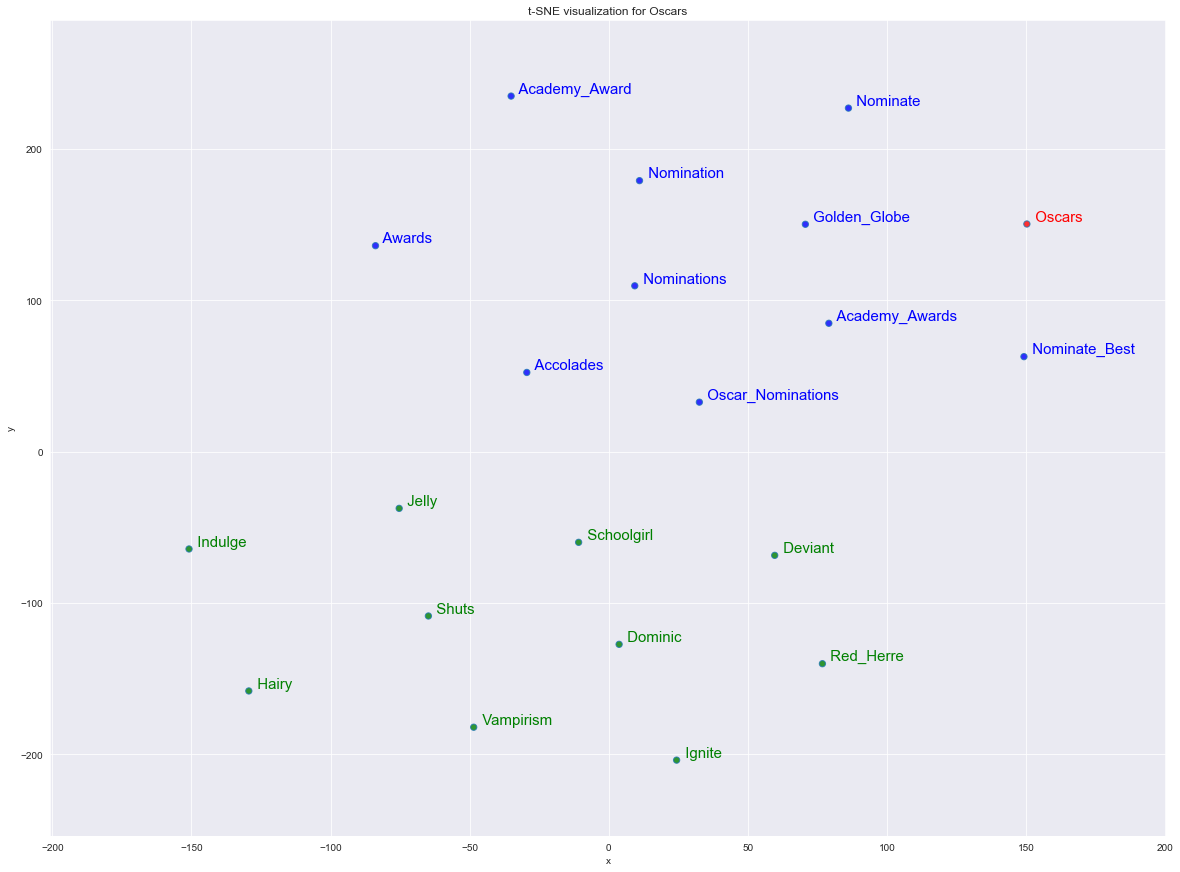

In [20]:
#10 palavras mais similares VS 10 palavras menos similares
tsnescatterplot(w2v, 'oscars', [i[0] for i in w2v.wv.most_similar(negative=["oscars"])])